# Exploratory Data Analysis - Projet Stations 5G (Training datas only)

## 1. Importation des Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Librairies importées.")

Librairies importées.


## 2. Chargement des Données

In [2]:
csv_file_path = 'train_processed.csv'

if not os.path.exists(csv_file_path):
    print(f"ERREUR : Le fichier {csv_file_path} n'a pas été trouvé.")
    raise FileNotFoundError(f"Le fichier {csv_file_path} est introuvable.")
else:
    print(f"Chargement du fichier : {csv_file_path}")
    df_train = pd.read_csv(csv_file_path, low_memory=False)
    print("Chargement terminé.")

Chargement du fichier : train_processed.csv
Chargement terminé.


## 3. Informations Générales sur le Dataset

In [3]:
if 'df_train' in locals():
    print(f"Dimensions du DataFrame (lignes, colonnes) : {df_train.shape}")

    print("\nTypes de données et informations sur les colonnes :")
    df_train.info()

    print("\nStatistiques sur les valeurs manquantes par colonne (Top 5) :")
    missing_values = df_train.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if missing_values.empty:
        print("Aucune valeur manquante détectée. C'est une bonne nouvelle !")
    else:
        print(missing_values.sort_values(ascending=False).head())

    print("\nAperçu des 5 premières lignes :")
    display(df_train.head())

else:
    print("Le DataFrame df_train n'a pas été chargé correctement.")

Dimensions du DataFrame (lignes, colonnes) : (1491, 3458)

Types de données et informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Columns: 3458 entries, ID to f_3455
dtypes: float64(3456), int64(2)
memory usage: 39.3 MB

Statistiques sur les valeurs manquantes par colonne (Top 5) :
Aucune valeur manquante détectée. C'est une bonne nouvelle !

Aperçu des 5 premières lignes :


,ID,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,...,f_3406,f_3407,f_3408,f_3409,f_3410,f_3411,f_3412,f_3413,f_3414,f_3415,f_3416,f_3417,f_3418,f_3419,f_3420,f_3421,f_3422,f_3423,f_3424,f_3425,f_3426,f_3427,f_3428,f_3429,f_3430,f_3431,f_3432,f_3433,f_3434,f_3435,f_3436,f_3437,f_3438,f_3439,f_3440,f_3441,f_3442,f_3443,f_3444,f_3445,f_3446,f_3447,f_3448,f_3449,f_3450,f_3451,f_3452,f_3453,f_3454,f_3455
0,0,0,-42.948462,-34.199885,-30.691196,-45.281565,-27.159948,-37.036769,-27.196869,-46.880042,-55.278376,-40.201860,-39.392719,-45.085894,-38.800015,-43.901099,-28.102497,-46.089221,-36.717136,-26.544630,-45.433189,-41.717226,-20.013706,-38.856322,-33.748465,-41.942007,-55.787125,-33.833808,-37.818297,-44.236771,-45.384903,-43.324116,-32.739081,-42.467967,-39.173975,-34.683815,-29.792184,-23.035070,-36.334178,-41.770634,-38.441014,-52.025438,-50.872145,-38.329127,-45.506854,-39.257242,-52.766304,-43.478831,-31.546480,-45.919463,...,-32.996104,-40.592587,-49.275465,-32.220619,-31.864732,-35.843362,-38.054934,-26.001449,-30.307115,-45.813075,-44.657663,-35.511655,-43.658579,-43.802738,-28.170504,-30.812015,-34.807780,-44.704120,-51.158576,-32.916230,-39.655832,-46.230357,-35.288231,-33.483597,-34.757500,-46.669562,-39.484521,-38.076499,-42.497011,-36.779481,-35.175179,-38.855541,-37.768265,-45.878381,-44.602316,-29.094071,-39.390380,-38.895636,-33.707665,-29.672009,-34.872647,-45.630532,-46.503523,-41.990423,-22.166269,-47.075403,-40.998002,-31.319097,-36.972738,-36.311521
1,1,0,-29.737236,-25.753736,-37.949008,-48.141273,-34.831778,-41.446983,-38.129590,-44.418079,-55.591961,-31.067240,-37.614454,-34.016562,-44.836586,-51.669510,-35.041048,-45.922877,-21.308929,-13.546422,-46.406436,-36.647787,-32.122264,-34.646020,-43.167117,-49.664442,-43.568353,-30.256607,-36.510094,-49.395159,-46.148288,-34.905118,-35.891805,-56.937806,-20.051780,-30.903364,-44.596129,-45.295145,-32.865445,-39.831034,-39.148193,-49.090025,-38.089672,-38.306726,-38.958764,-28.450137,-50.767379,-34.412613,-25.481009,-47.625401,...,-44.250772,-49.568576,-36.542508,-25.590115,-41.203034,-49.174883,-28.295419,-24.160708,-23.419595,-36.602787,-28.787370,-36.937602,-42.053789,-47.692037,-29.022920,-39.690255,-33.491942,-47.154865,-42.460258,-17.408557,-37.175402,-38.088484,-27.871710,-37.622523,-26.254888,-43.304304,-35.391012,-34.082827,-36.521236,-41.795162,-23.859032,-36.994081,-37.861851,-35.919048,-44.148634,-16.567998,-44.461422,-40.465099,-30.444872,-20.902573,-33.427772,-47.477845,-37.455443,-43.099366,-34.458101,-39.223231,-33.408899,-45.655739,-34.308090,-46.509676
2,10,2,-28.809412,-21.332285,-44.010719,-48.457581,-50.332964,-37.401645,-47.338483,-51.549376,-44.177276,-40.349714,-48.311229,-39.048489,-41.850367,-45.010990,-39.969489,-53.233791,-42.352313,-43.903180,-43.555372,-56.214030,-48.886974,-42.188256,-45.851745,-56.665933,-43.905827,-43.615804,-47.827701,-54.373965,-44.751014,-32.652012,-44.295653,-48.017058,-36.045659,-36.624213,-49.626134,-51.083474,-45.586482,-41.072333,-36.003721,-50.034158,-40.154274,-17.123689,-52.236723,-48.511556,-40.176593,-42.944327,-51.667678,-47.406887,...,-36.774463,-50.742927,-32.637539,-47.434498,-50.605755,-28.507524,-48.232778,-35.888323,-39.334007,-53.869630,-43.459088,-42.492358,-51.961694,-53.717068,-44.743803,-46.861877,-45.340268,-50.708431,-34.208096,-45.379720,-45.657903,-46.173897,-39.475525,-38.413707,-45.760062,-44.481514,-43.288255,-44.180491,-51.735069,-50.312729,-45.586694,-37.176245,-44.711646,-52.578462,-36.210232,-50.399758,-50.274131,-54.305526,-49.887876,-39.840966,-55.879599,-60.160620,-47.124255,-43.495131,-50.089404,-24.245044,-41.121011,-39.685115,-51.886279,-49.112773
3,100,0,-24.033439,-37.224449,-41.048676,-45.728247,-27.487252,-34.885894,-41.107078,-48.399470,-53.953887,-45.467289,-42.767725,-49.500397,

## 4. Analyse de la Variable Cible (`target`)

Distribution de la variable cible 'target' :
target
0    1209
1     141
2     141
Name: count, dtype: int64

Distribution en pourcentage :
target
0    81.086519
1     9.456740
2     9.456740
Name: proportion, dtype: float64


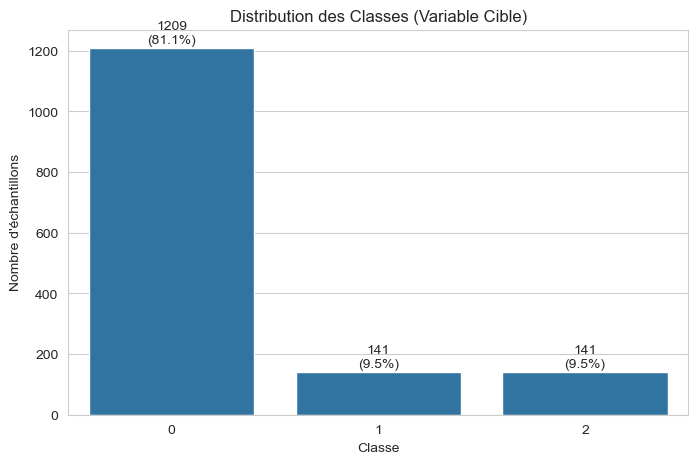

In [4]:
if 'df_train' in locals():
    print("Distribution de la variable cible 'target' :")
    target_counts = df_train['target'].value_counts().sort_index()
    print(target_counts)

    print("\nDistribution en pourcentage :")
    target_percentage = df_train['target'].value_counts(normalize=True).sort_index() * 100
    print(target_percentage)

    plt.figure(figsize=(8, 5))
    sns.countplot(x='target', data=df_train, order=target_counts.index)
    plt.title('Distribution des Classes (Variable Cible)')
    plt.xlabel('Classe')
    plt.ylabel('Nombre d\'échantillons')
    
    for index, value in enumerate(target_counts):
        percentage = target_percentage.iloc[index]
        plt.text(index, value + 5, f"{value}\n({percentage:.1f}%)", ha='center', va='bottom')
    plt.show()
else:
    print("Le DataFrame df_train n'a pas été chargé correctement.")

**Observations sur la distribution des classes :**
* La classe 0 (légitime) est la plus fréquente.
* Les classes 1 et 2 (fausses stations) sont moins représentées.
* Il y a un déséquilibre notable entre les classes. La classe 0 est majoritaire. Cela devra être pris en compte lors de l'entraînement (par exemple, en utilisant des métriques appropriées comme le F1-score, la précision pondérée, ou des techniques de ré-échantillonnage comme SMOTE ou la pondération des classes).

## 5. Analyse des Features (`f_0` à `f_3455`)

### 5.1 Statistiques Descriptives

Statistiques descriptives des features (f_0 à f_3455) :


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,...,f_3406,f_3407,f_3408,f_3409,f_3410,f_3411,f_3412,f_3413,f_3414,f_3415,f_3416,f_3417,f_3418,f_3419,f_3420,f_3421,f_3422,f_3423,f_3424,f_3425,f_3426,f_3427,f_3428,f_3429,f_3430,f_3431,f_3432,f_3433,f_3434,f_3435,f_3436,f_3437,f_3438,f_3439,f_3440,f_3441,f_3442,f_3443,f_3444,f_3445,f_3446,f_3447,f_3448,f_3449,f_3450,f_3451,f_3452,f_3453,f_3454,f_3455
count,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,...,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000,1491.000000
mean,-36.025564,-31.790284,-42.053352,-43.198133,-33.594962,-35.821412,-38.591200,-47.680546,-50.421536,-36.818454,-39.471084,-45.337717,-44.959230,-41.786019,-38.678062,-47.393613,-36.058412,-31.464525,-41.814836,-43.386053,-33.286691,-35.694820,-38.698073,-47.533810,-50.346930,-37.212534,-39.346087,-45.467748,-44.836730,-41.656916,-38.622683,-47.690803,-36.096603,-31.704759,-41.631091,-43.312991,-33.600195,-35.803083,-38.750827,-47.803647,-50.320637,-36.899487,-39.090073,-45.554903,-44.997320,-41.800599,-38.867731,-47.609286,-38.495007,-31.901740,...,-37.947594,-46.921484,-41.978617,-32.050505,-39.358973,-44.924048,-35.197003,-30.868849,-37.850103,-46.834003,-42.103319,-37.214245,-38.295751,-45.196111,-36.168401,-38.437433,-37.944975,-46.661971,-42.198998,-31.961830,-39.320235,-44.454730,-35.309261,-30.877397,-37.676651,-46.853127,-41.927245,-37.397909,-37.905428,-45.033582,-36.318557,-38.187705,-38.015428,-46.894530,-42.115760,-31.912594,-39.341957,-44.899234,-35.080662,-30.707167,-37.896077,-46.660745,-42.004805,-37.433666,-37.981836,-45.028051,-36.010089,-38.202824,-37.853285,-46.918447
std,7.526132,8.278178,6.915052,7.170975,8.335229,7.265872,7.083250,7.322659,8.992517,7.124871,7.122577,7.215592,9.460700,7.820508,6.974692,7.457595,7.811176,8.504040,7.325711,7.305045,8.401928,7.599864,7.017055,7.438960,8.977273,6.959687,6.999413,7.358339,9.747213,8.220349,6.796199,7.404952,7.660500,8.257522,7.141636,7.212557,7.980178,7.543226,6.923278,7.367385,8.655987,7.121188,6.998521,7.391976,9.726203,8.178601,7.022192,7.426606,7.812507,9.546852,...,7.051659,6.934974,9.248732,7.799815,7.085688,7.325267,7.488646,7.065932,7.082535,7.041343,7.051053,7.368878,7.577307,7.083053,7.132543,7.676382,7.118611,7.259690,9.312647,7.758236,7.109015,7.178121,7.518897,6.976082,7.181278,7.079872,7.290258,7.088800,7.255884,7.039258,7.027079,7.785204,7.122885,7.105482,9.330801,7.415486,7.214411,7.336992,7.208033,7.178794,7.104150,7.434672,7.062555,7.139658,7.708081,7.261451,6.899449,7.582654,6.995269,6.985596
min,-49.546726,-58.185262,-55.155300,-56.979272,-60.080805,-49.507622,-56.345732,-61.142043,-64.432936,-52.666482,-59.386364,-57.800523,-60.019665,-55.450952,-55.344266,-61.38304

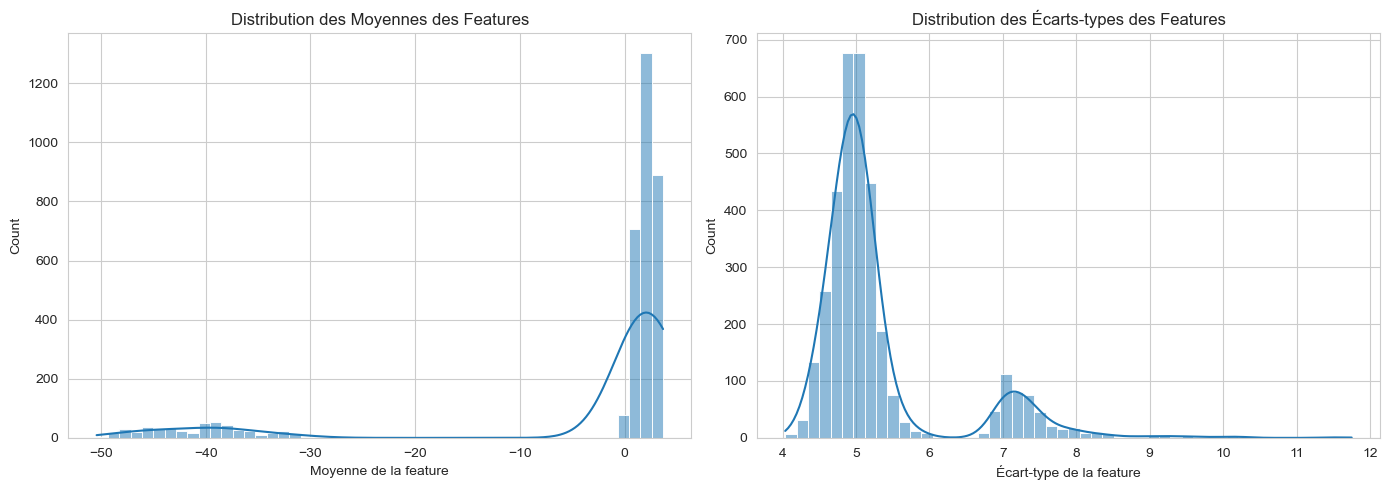

In [5]:
if 'df_train' in locals():
    print("Statistiques descriptives des features (f_0 à f_3455) :")
    features_df = df_train.drop(['ID', 'target'], axis=1)
    
    desc_stats = features_df.describe()
    display(desc_stats)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(desc_stats.loc['mean'], bins=50, kde=True)
    plt.title('Distribution des Moyennes des Features')
    plt.xlabel('Moyenne de la feature')

    plt.subplot(1, 2, 2)
    sns.histplot(desc_stats.loc['std'], bins=50, kde=True)
    plt.title('Distribution des Écarts-types des Features')
    plt.xlabel('Écart-type de la feature')

    plt.tight_layout()
    plt.show()
else:
    print("Le DataFrame df_train n'a pas été chargé correctement.")

**Observations sur les statistiques des features :**
* Y a-t-il une grande variation dans les échelles (min/max) entre les différentes features ? (Regarder les lignes 'min', 'max', 'std'). Si oui, une mise à l'échelle (scaling) sera probablement nécessaire avant d'entraîner certains types de modèles (ex: SVM, réseaux de neurones, régression logistique).
* Oui, en regardant les lignes min et max du tableau describe(), on observe des variations. Par exemple, f_4 a un min de -60 et un max de 0.2, tandis que f_17 a un min de -59 et un max de 8.8. La feature f_48 a une valeur maximale particulièrement élevée (38.6) comparée aux autres. Les écarts-types (std) varient également (principalement entre 7 et 9.7 environ).
* Les moyennes et écarts-types sont-ils similaires pour toutes les features ou très variés ?
* Les moyennes (mean) sont relativement groupées (souvent entre -30 et -50), comme le montre l'histogramme des moyennes, mais elles ne sont pas identiques. Les écarts-types (std) montrent également une certaine variabilité (histogramme des écarts-types), indiquant que la dispersion des valeurs autour de la moyenne n'est pas la même pour toutes les features. Ils sont donc variés.
* Y a-t-il des valeurs aberrantes évidentes (min/max très éloignés des quartiles) ?
* Oui, potentiellement. La valeur maximale de f_48 (38.59) est très éloignée de son 75ème percentile (-35.69). De même, le maximum de f_17 (8.79) est très au-dessus de son 75ème percentile (-26.81). D'autres features pourraient également avoir des valeurs min/max semblant éloignées des quartiles (25% et 75%), suggérant la présence possible de valeurs aberrantes.

### 5.2 Visualisation d'Échantillons

IDs des échantillons sélectionnés pour visualisation : {0: 0, 1: 1009, 2: 10}


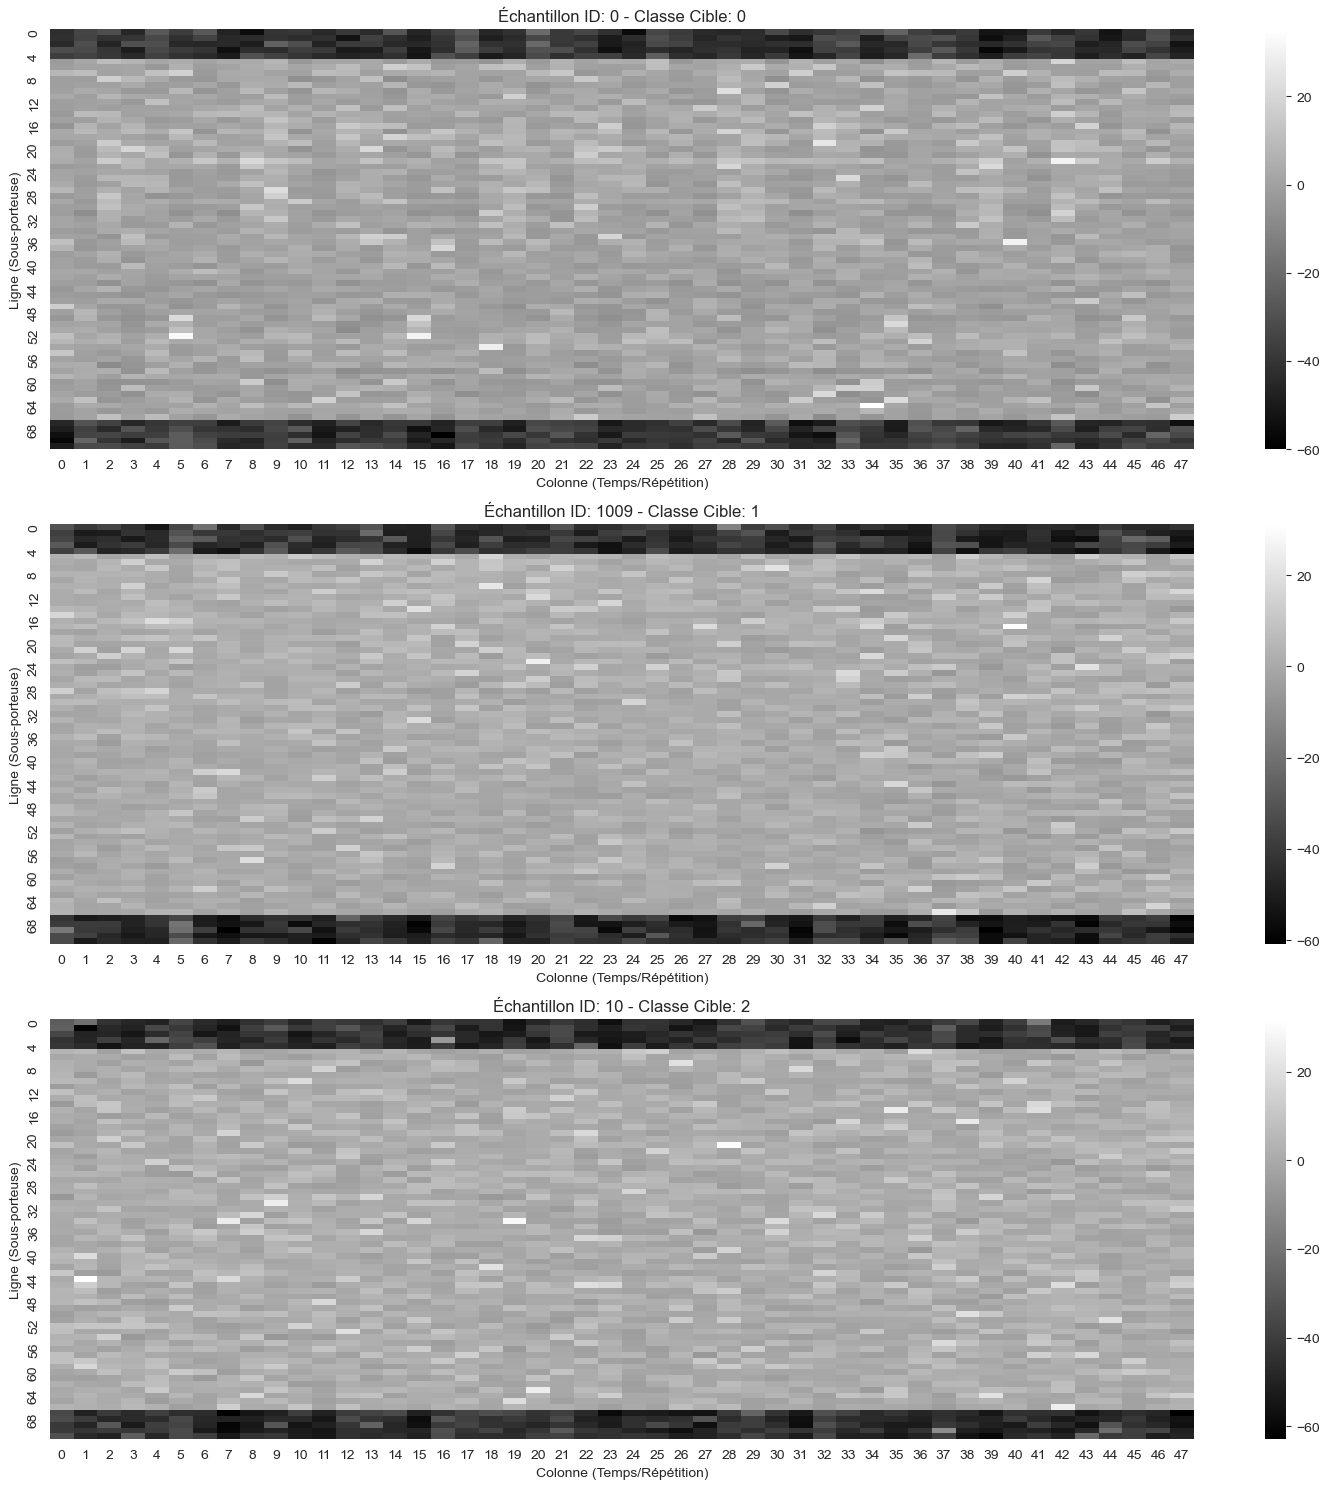

In [6]:
if 'df_train' in locals():
    img_rows, img_cols = 72, 48
    num_features = img_rows * img_cols

    sample_ids = {}
    for target_class in sorted(df_train['target'].unique()):
        sample_id = df_train[df_train['target'] == target_class]['ID'].iloc[0]
        sample_ids[target_class] = sample_id

    print(f"IDs des échantillons sélectionnés pour visualisation : {sample_ids}")

    plt.figure(figsize=(15, 5 * len(sample_ids)))
    plot_index = 1
    for target_class, sample_id in sample_ids.items():
        sample_row = df_train[df_train['ID'] == sample_id].iloc[0]
        
        sample_features = sample_row.filter(regex='^f_').values
        
        if len(sample_features) == num_features:
            sample_image = sample_features.reshape((img_rows, img_cols))
            
            plt.subplot(len(sample_ids), 1, plot_index)
            sns.heatmap(sample_image, cmap='gray', cbar=True)
            plt.title(f'Échantillon ID: {sample_id} - Classe Cible: {target_class}')
            plt.xlabel('Colonne (Temps/Répétition)')
            plt.ylabel('Ligne (Sous-porteuse)')
            plot_index += 1
        else:
            print(f"Erreur: L'échantillon ID {sample_id} n'a pas {num_features} features, mais {len(sample_features)}.")

    plt.tight_layout()
    plt.show()

else:
    print("Le DataFrame df_train n'a pas été chargé correctement.")

**Observations sur les visualisations :**
* Voit-on des structures ou des motifs différents entre les classes ?
* Oui, les heatmaps des échantillons des classes 0, 1 et 2 montrent des motifs visuels distincts. L'échantillon de la classe 0 (ID 0) semble avoir des zones globalement plus claires (valeurs moins négatives) que les échantillons des classes 1 (ID 1009) et 2 (ID 10). Les classes 1 et 2 présentent des zones plus sombres (valeurs plus négatives), mais leurs localisations et intensités semblent différentes entre les deux.
* Certaines zones de l'image (correspondant à certaines features) semblent-elles plus discriminantes ?
* Il est difficile de le dire avec certitude à partir d'un seul exemple par classe, mais certaines régions (groupes de lignes/colonnes dans la heatmap) semblent avoir des motifs différents selon la classe. Par exemple, les structures dans la moitié inférieure des images paraissent varier. Cela suggère que certaines features (ou combinaisons) pourraient être plus informatives que d'autres pour distinguer les classes.
* La visualisation sous forme d'image 2D (72x48) confirme que les données possèdent une structure (potentiellement spatiale ou fréquentielle, selon la nature exacte des features) qui pourrait être exploitée par des modèles spécifiques comme les CNNs.

## 6. Réduction de Dimension pour Visualisation

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### 6.1 Mise à l'échelle des Features

In [8]:
if 'df_train' in locals():
    print("Mise à l'échelle des features...")
    features_cols = df_train.filter(regex='^f_').columns
    X = df_train[features_cols]
    y = df_train['target']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    print(f"Features mises à l'échelle. Dimensions de X_scaled : {X_scaled.shape}")
else:
    print("Le DataFrame df_train n'a pas été chargé correctement.")

Mise à l'échelle des features...
Features mises à l'échelle. Dimensions de X_scaled : (1491, 3456)


### 6.2 Analyse en Composantes Principales (PCA)

Application de la PCA (n_components=2)...
PCA terminée. Dimensions de X_pca : (1491, 2)
Variance expliquée par la 1ère composante : 5.58%
Variance expliquée par la 2ème composante : 3.69%
Variance totale expliquée par les 2 composantes : 9.27%


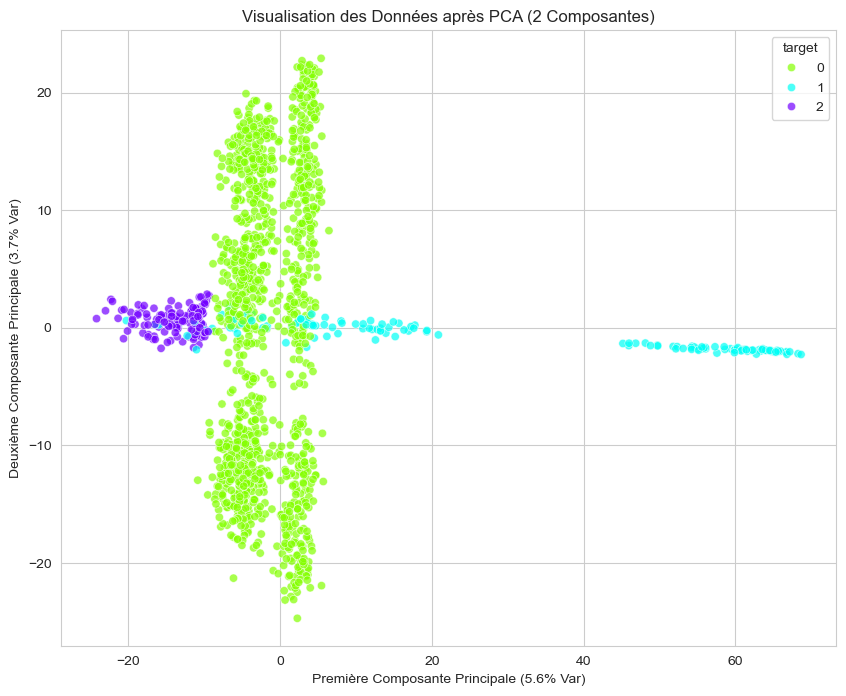

In [9]:
if 'X_scaled' in locals():
    print("Application de la PCA (n_components=2)...")
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    print(f"PCA terminée. Dimensions de X_pca : {X_pca.shape}")

    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Variance expliquée par la 1ère composante : {explained_variance_ratio[0]*100:.2f}%")
    print(f"Variance expliquée par la 2ème composante : {explained_variance_ratio[1]*100:.2f}%")
    print(f"Variance totale expliquée par les 2 composantes : {explained_variance_ratio.sum()*100:.2f}%")

    df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
    df_pca['target'] = y

    # Visualisation
    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="PC1", y="PC2",
        hue="target",
        palette=sns.color_palette("hsv", n_colors=len(df_pca['target'].unique())),
        data=df_pca,
        legend="full",
        alpha=0.7
    )
    plt.title('Visualisation des Données après PCA (2 Composantes)')
    plt.xlabel(f'Première Composante Principale ({explained_variance_ratio[0]*100:.1f}% Var)')
    plt.ylabel(f'Deuxième Composante Principale ({explained_variance_ratio[1]*100:.1f}% Var)')
    plt.show()

else:
    print("Les données mises à l'échelle (X_scaled) ne sont pas disponibles.")

**Observations sur la PCA :**
* Variance expliquée : Les deux premières composantes principales expliquent 9.27% de la variance totale (5.58% pour PC1 et 3.69% pour PC2). C'est une très faible proportion, ce qui est attendu vu le grand nombre initial de features.
* Les classes sont-elles bien séparées dans cet espace PCA 2D ?
* Non, les classes ne sont pas bien séparées dans cet espace PCA 2D.
* Y a-t-il beaucoup de superposition entre les classes ?
* Il y a une superposition très importante entre les points des différentes classes.
* La classe 0 semble-t-elle distincte des classes 1 et 2 ? Les classes 1 et 2 sont-elles séparables entre elles ?
* La classe 0 forme un grand nuage de points, et les points des classes 1 et 2 sont largement inclus et mélangés à l'intérieur de ce nuage. Les classes 1 et 2 ne sont pas du tout séparables entre elles dans cette projection.

### 6.3 t-SNE (t-distributed Stochastic Neighbor Embedding)

Application de t-SNE (n_components=2)... (Cela peut prendre un moment)


C:\Users\redh0\.conda\envs\Privacy_Preserving_Face_Recognition_Project\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE terminée. Dimensions de X_tsne : (1491, 2)


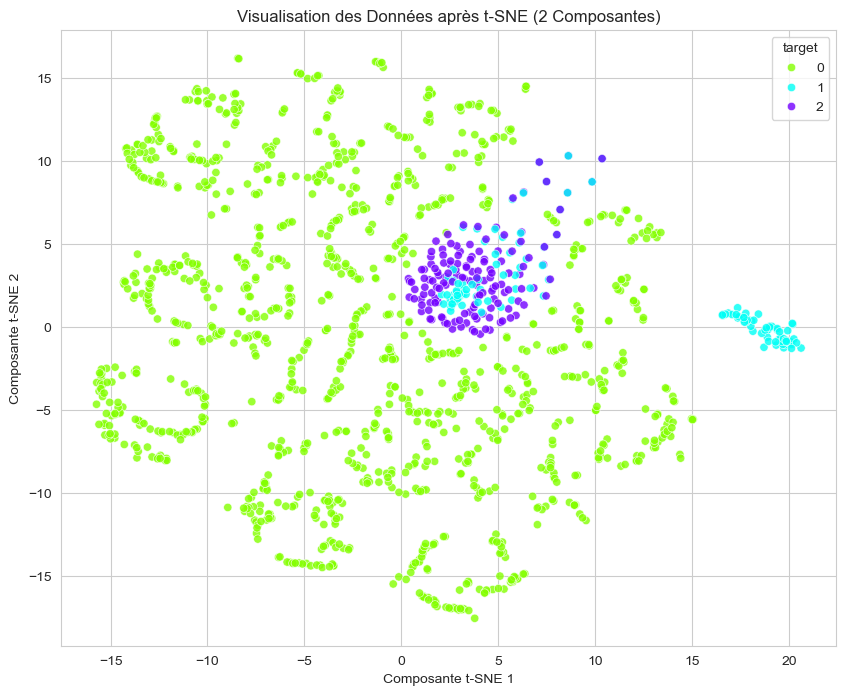

In [10]:
if 'X_scaled' in locals():
    print("Application de t-SNE (n_components=2)... (Cela peut prendre un moment)")

    tsne = TSNE(
        n_components=2,
        random_state=42,
        perplexity=30,
        n_iter=350,
        init='pca',
        learning_rate='auto'
    )
    X_tsne = tsne.fit_transform(X_scaled)

    print(f"t-SNE terminée. Dimensions de X_tsne : {X_tsne.shape}")

    df_tsne = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
    df_tsne['target'] = y

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x="TSNE1", y="TSNE2",
        hue="target",
        palette=sns.color_palette("hsv", n_colors=len(df_tsne['target'].unique())),
        data=df_tsne,
        legend="full",
        alpha=0.8
    )
    plt.title('Visualisation des Données après t-SNE (2 Composantes)')
    plt.xlabel('Composante t-SNE 1')
    plt.ylabel('Composante t-SNE 2')
    plt.show()

else:
    print("Les données mises à l'échelle (X_scaled) ne sont pas disponibles.")

**Observations sur t-SNE :**
* t-SNE parvient-elle à former des groupes (clusters) plus distincts pour chaque classe que la PCA ?
* Oui, t-SNE parvient à former des groupes.
* La séparation entre les classes 0, 1 et 2 est-elle plus nette ?
* La séparation entre les classes 0, 1 et 2 est nettement améliorée avec t-SNE. La classe 0 forme un grand cluster assez bien défini, et les classes 1 et 2 forment des clusters plus petits, relativement séparés du cluster de la classe 0.
* Y a-t-il encore des points qui semblent mal classés ou à la frontière entre les clusters ?
* Oui, malgré l'amélioration, il reste des points qui semblent être à la frontière entre les clusters ou même mélangés. Les clusters des classes 1 et 2 sont proches l'un de l'autre et présentent un léger mélange.
* **Important :** La distance entre les clusters t-SNE n'a pas forcément de signification directe, contrairement à la variance en PCA. t-SNE est surtout utile pour voir si des groupes existent.